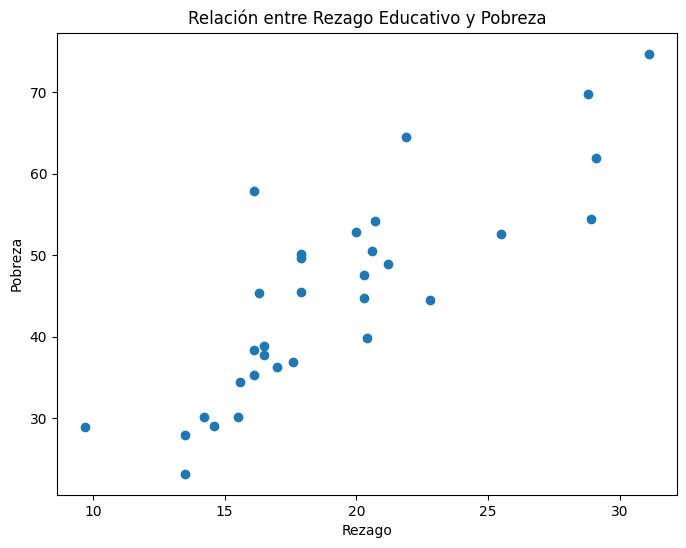

La correlación entre Rezago Educativo y Pobreza es de 0.8390110852992572


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Leer el archivo Excel
Dat = pd.read_excel("RezagoPobreza.xlsx")

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(Dat['Rezago'], Dat['Pobreza'])
plt.xlabel('Rezago')
plt.ylabel('Pobreza')
plt.title('Relación entre Rezago Educativo y Pobreza')
plt.show()

# Calcular la correlación
correlacion = Dat['Rezago'].corr(Dat['Pobreza'])
print(f"La correlación entre Rezago Educativo y Pobreza es de {correlacion}")

Interpretar: ¿Qué se observa de relevante?


Coeficientes del modelo:
Intercepto: 4.627675937710791
Pendiente: 2.09821587688203

El R² del modelo es: 70.39999999999999 por ciento


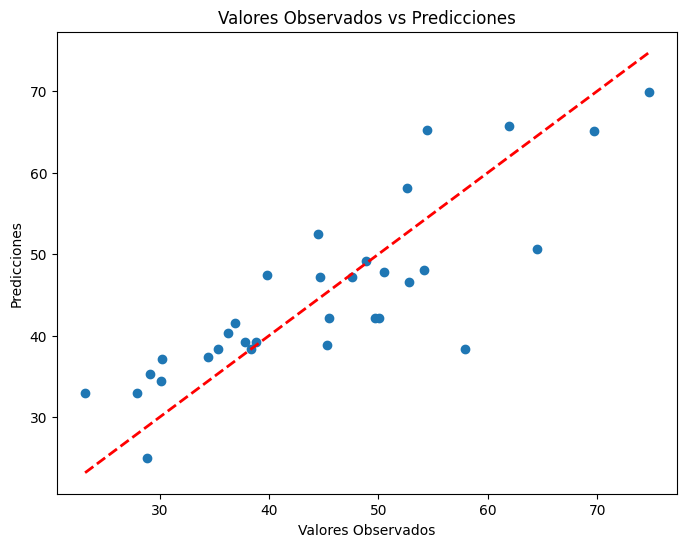


Estadístico t (pendiente): 8.445748921557534
Valor p (pendiente): 2.0005768153197323e-09

R² ajustado: 0.6940709212968723


In [4]:
# Ajuste de un modelo de regresión
X = Dat[['Rezago']]
y = Dat['Pobreza']

m1 = LinearRegression()
m1.fit(X, y)

# Resumen del modelo
print("Coeficientes del modelo:")
print(f"Intercepto: {m1.intercept_}")
print(f"Pendiente: {m1.coef_[0]}")

# R² del modelo
r2 = m1.score(X, y)
print(f"\nEl R² del modelo es: {100 * round(r2, 3)} por ciento")

# Predicciones
predicciones = m1.predict(X)

# Gráfico de valores observados vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones')
plt.show()

# Estadísticas adicionales del modelo
n = len(y)
p = 1  # número de predictores
residuos = y - predicciones
sse = np.sum(residuos**2)
sst = np.sum((y - y.mean())**2)
mse = sse / (n - p - 1)
se = np.sqrt(mse)

# Error estándar de los coeficientes
se_coef = se / np.sqrt(np.sum((X['Rezago'] - X['Rezago'].mean())**2))
se_intercept = se * np.sqrt(1/n + X['Rezago'].mean()**2 / np.sum((X['Rezago'] - X['Rezago'].mean())**2))

# Valores t
t_coef = m1.coef_[0] / se_coef
t_intercept = m1.intercept_ / se_intercept

# Valores p
p_coef = 2 * (1 - stats.t.cdf(abs(t_coef), n - p - 1))
p_intercept = 2 * (1 - stats.t.cdf(abs(t_intercept), n - p - 1))

print(f"\nEstadístico t (pendiente): {t_coef}")
print(f"Valor p (pendiente): {p_coef}")
print(f"\nR² ajustado: {1 - (1 - r2) * (n - 1) / (n - p - 1)}")

#Qué se observa de destacado al ajustar:
Interpretar el modelo, su calidad de ajuste

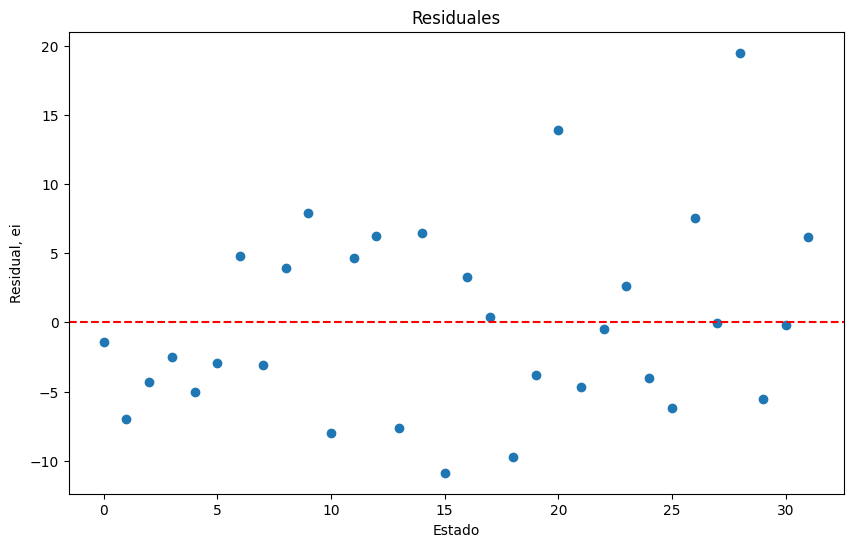

Desviación estándar de los residuales: 6.872869064552662


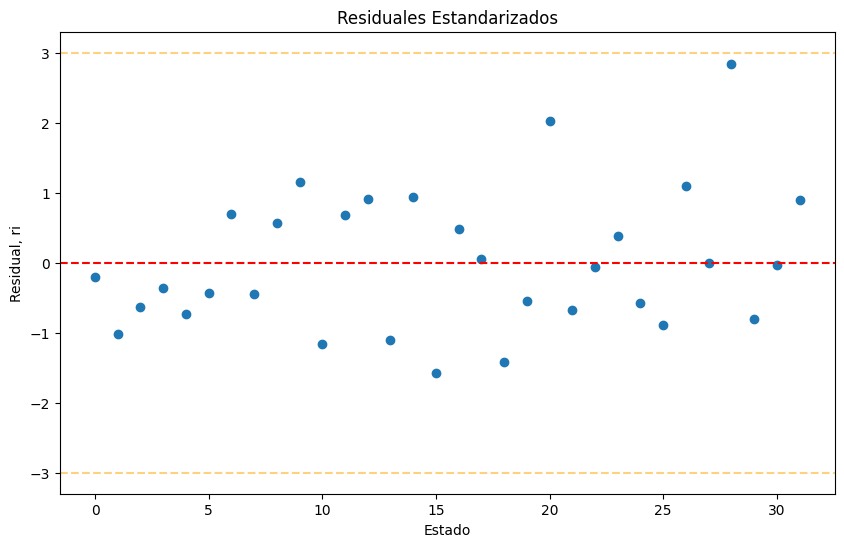

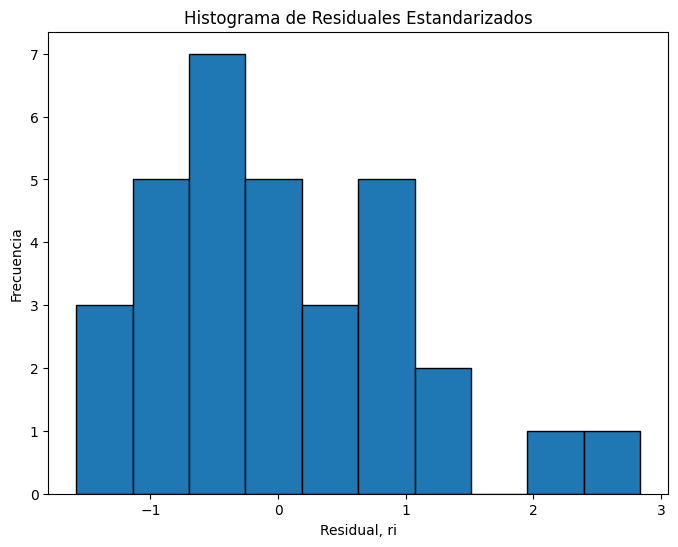

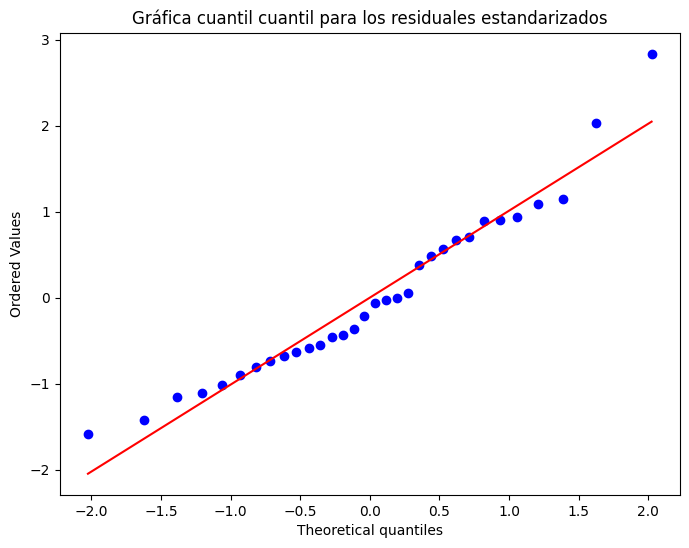


Test de Shapiro-Wilk:
Estadístico: 0.9515319196336851
Valor p: 0.15929086405009907


In [5]:
# Análisis de residuales
residuos = y - predicciones

# Residuales estandarizados
residuos_std = residuos / np.std(residuos, ddof=1)

# Gráfico de residuales
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos)), residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Estado')
plt.ylabel('Residual, ei')
plt.title('Residuales')
plt.show()

print(f"Desviación estándar de los residuales: {np.std(residuos, ddof=1)}")

# Gráfico de residuales estandarizados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_std)), residuos_std)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='orange', linestyle='--', alpha=0.5)
plt.axhline(y=-3, color='orange', linestyle='--', alpha=0.5)
plt.xlabel('Estado')
plt.ylabel('Residual, ri')
plt.title('Residuales Estandarizados')
plt.show()

# Histograma de residuales estandarizados
plt.figure(figsize=(8, 6))
plt.hist(residuos_std, bins=10, edgecolor='black')
plt.xlabel('Residual, ri')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales Estandarizados')
plt.show()

# Gráfica Q-Q
plt.figure(figsize=(8, 6))
stats.probplot(residuos_std, dist="norm", plot=plt)
plt.title('Gráfica cuantil cuantil para los residuales estandarizados')
plt.show()

# Test de Shapiro-Wilk
shapiro_stat, shapiro_p = stats.shapiro(residuos_std)
print(f"\nTest de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_stat}")
print(f"Valor p: {shapiro_p}")

#Interpretar el análisis de residuales

In [6]:
# Depuración en caso de residuales atípicos
# outliers = np.where(np.abs(residuos_std) > 3.0)[0]
# outliers
# Dat2 = Dat.drop(outliers)

# Encontrar el índice del valor máximo
indice_max = np.argmax(np.abs(residuos_std))

# Mostrar el valor y el estado correspondiente
if 'Estado' in Dat.columns:
    print(f"Estado con el residual más grande: {Dat['Estado'].iloc[indice_max]}")
else:
    print(f"Índice con el residual más grande: {indice_max}")

outliers = np.where(np.abs(residuos_std) > 3.0)[0]
print(f"\nOutliers (residuales > 3): {outliers}")

# Eliminar el residual máximo y reajustar
Dat2 = Dat.drop(indice_max).reset_index(drop=True)

X2 = Dat2[['Rezago']]
y2 = Dat2['Pobreza']

m2 = LinearRegression()
m2.fit(X2, y2)

# Resumen del modelo 2
print("\nModelo 2 (sin outlier):")
print(f"Intercepto: {m2.intercept_}")
print(f"Pendiente: {m2.coef_[0]}")

r2_2 = m2.score(X2, y2)
print(f"El R² del modelo 2 es: {100 * round(r2_2, 3)} por ciento")

# Comparación de R²
print(f"\nComparación:")
print(f"R² modelo 1: {100 * round(r2, 3)}%")
print(f"R² modelo 2: {100 * round(r2_2, 3)}%")
print(f"Diferencia: {100 * round(r2_2 - r2, 3)}%")

Estado con el residual más grande: Tlaxcala

Outliers (residuales > 3): []

Modelo 2 (sin outlier):
Intercepto: 2.463023634275906
Pendiente: 2.1778365674539244
El R² del modelo 2 es: 77.60000000000001 por ciento

Comparación:
R² modelo 1: 70.39999999999999%
R² modelo 2: 77.60000000000001%
Diferencia: 7.199999999999999%


Interpretar qué ha pasado con la eliminación del residual máximo: